
!!!!!

To comment multiple lines control + /
To run control + Enter

3rd Exercise

1.Stem, Plot or Scatter?

2.Zero-Crossing rate for complex nums?

3.Plot Energy and zero crossing rate along with the signal with the appropriate scaling



Code for first exercise

In [2]:
import os
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd
import soundfile as sf

Query 1.1

Text(0.5, 1.0, 'DFT of y')

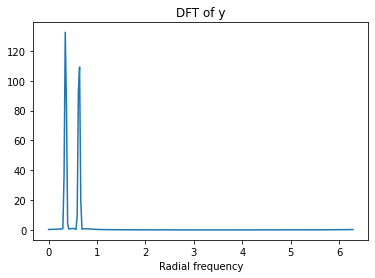

In [3]:
%matplotlib inline
L = 256
w = np.hamming(L) #Hamming window of L specimens

ph1 = random.random() #returns a random floating number between 0 and 1
ph2 = random.random()
v1 = np.pi/9
v2 = np.pi/5
A1 = 1
A2 = 0.9

n = np.arange(0,L,1)
x1 = A1*np.exp(1j*(v1*n+ph1)) #complex exponential of frequency v1
x2 = A2*np.exp(1j*(v2*n+ph2)) #complex exponential of frequency v2

y = w * (x1 + x2)
dft = np.fft.fft(y) #DFT of windowed signal x1 + x2

N = 256  #N specimens of radial frequency must be equal to my signal's specimens
f = np.linspace(0,2*np.pi,N)

#plotted the whole dft
plt.plot(f,abs(dft))
plt.xlabel('Radial frequency')
plt.title('DFT of y')

C:\Users\Admin\AppData\Local\Temp\ipykernel_19176\3924995502.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


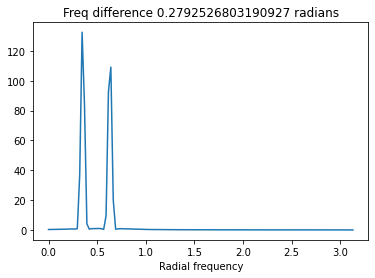

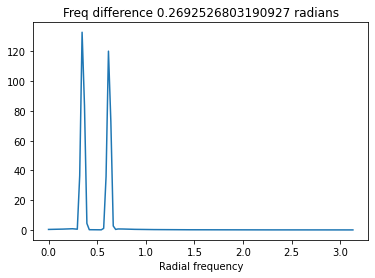

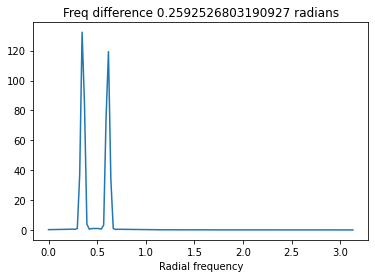

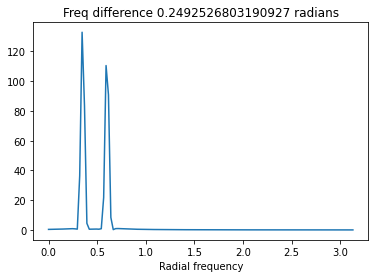

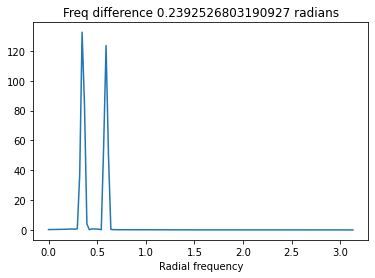

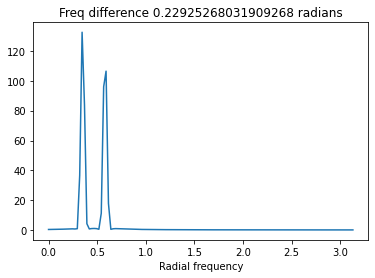

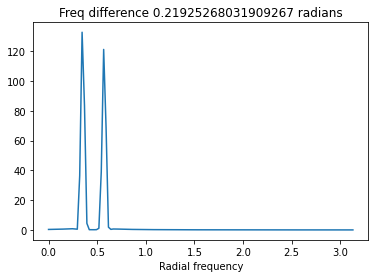

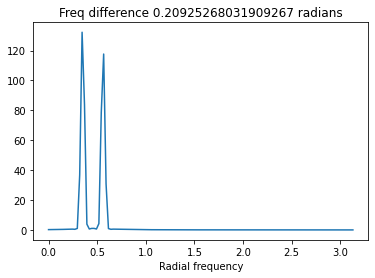

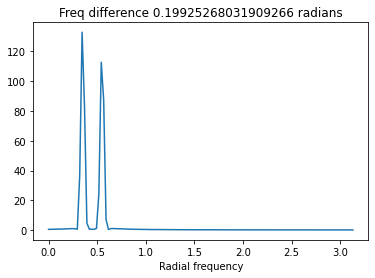

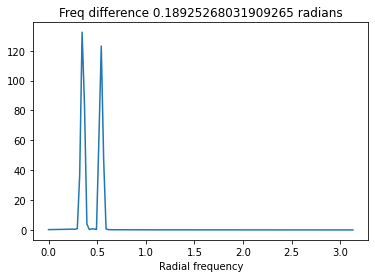

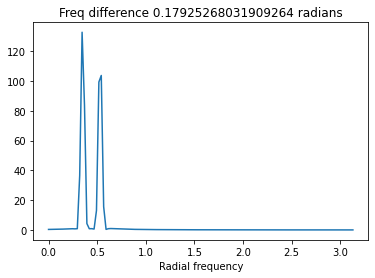

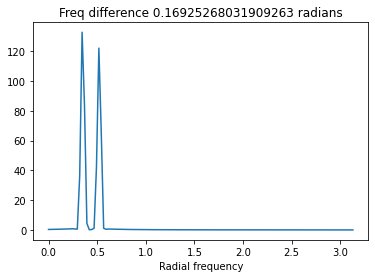

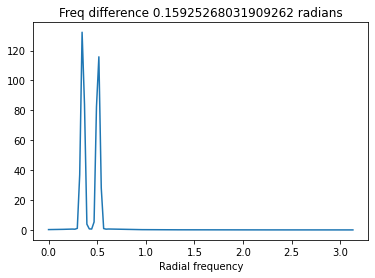

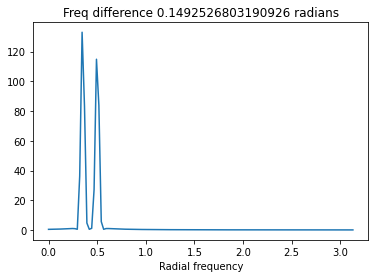

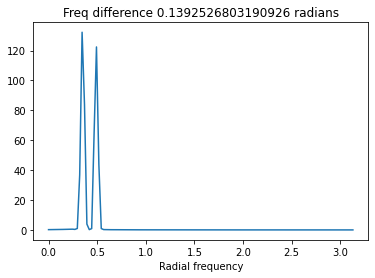

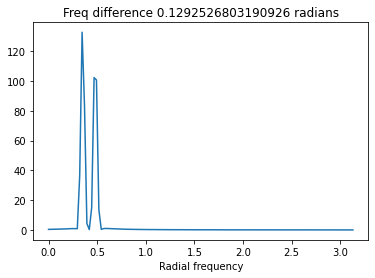

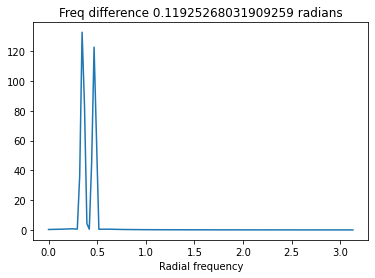

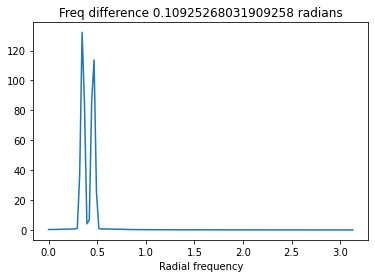

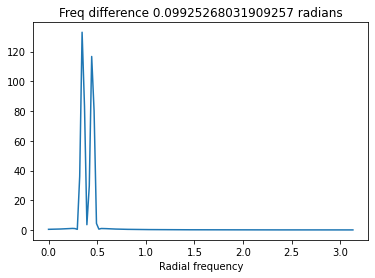

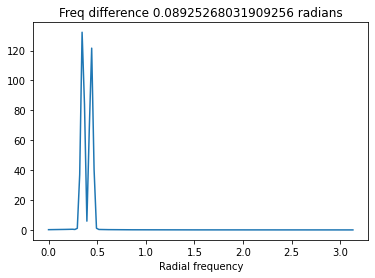

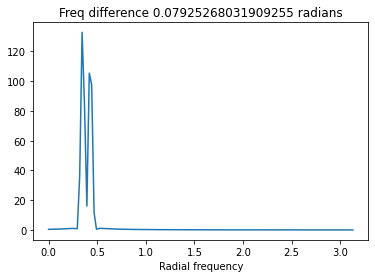

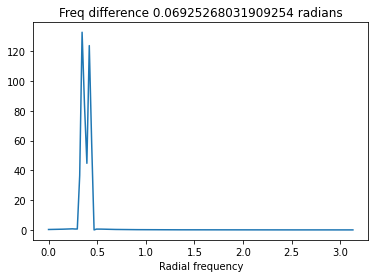

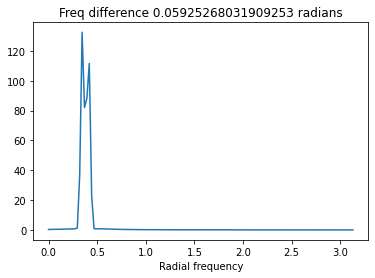

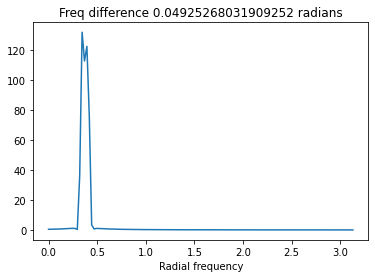

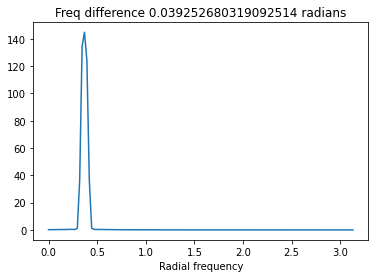

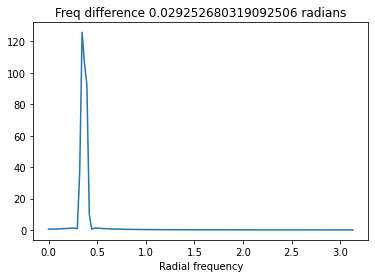

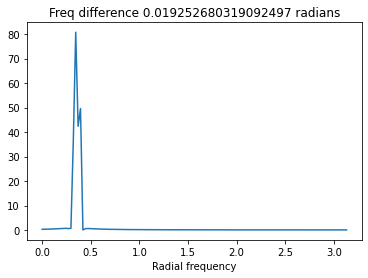

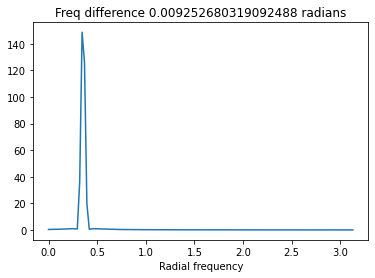

In [4]:
%matplotlib inline
v = np.arange(np.pi/5,np.pi/9,-0.01)

i = 0
for v2 in v:
    i = i+1
    x2 = A2*np.exp(1j*(v2*n+ph2))
    y = w*(x1+x2)                  # L = 256 specimens
    dft = np.fft.fft(y)            # N = 256 specimens
    dft_cut = dft[:128]            # for transparency of DFT
    f_cut = f[:128]
    plt.figure(i)
    plt.plot(f_cut,abs(dft_cut))
    plt.xlabel('Radial frequency')
    plt.title('Freq difference ' + str(v2-v1) + ' radians')


Query 1.2

N = 512

C:\Users\Admin\AppData\Local\Temp\ipykernel_19176\3318283718.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


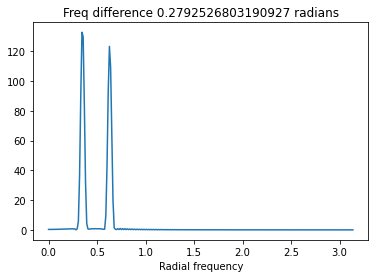

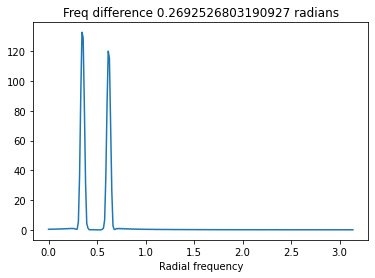

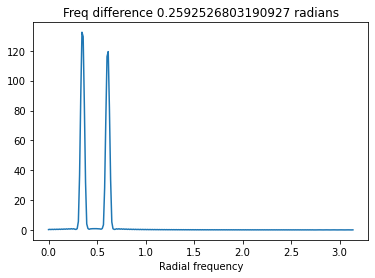

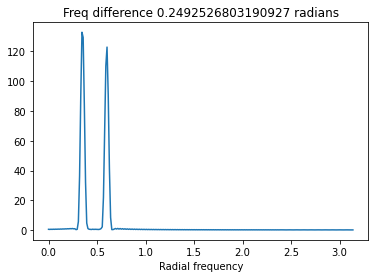

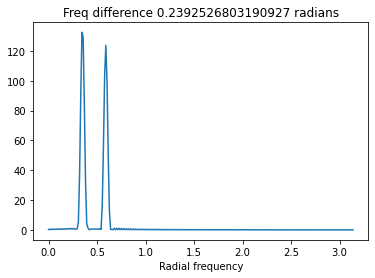

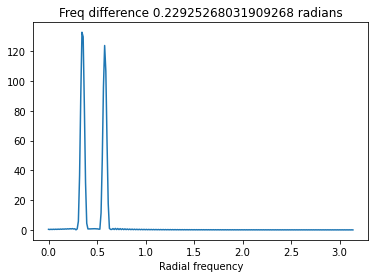

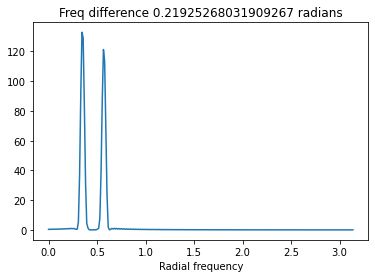

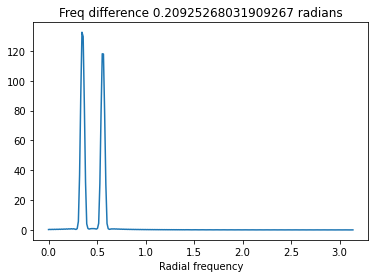

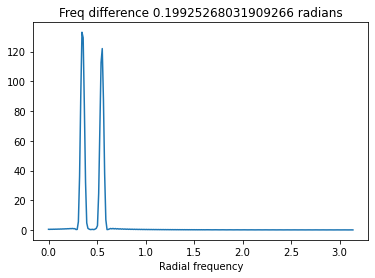

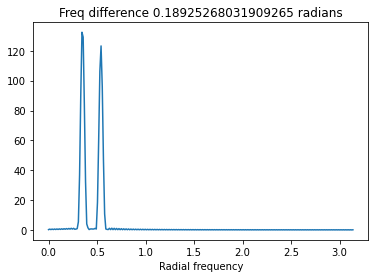

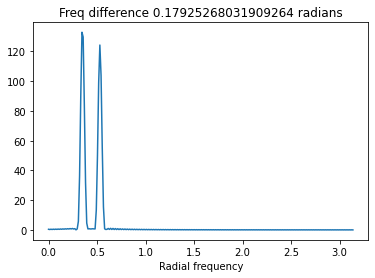

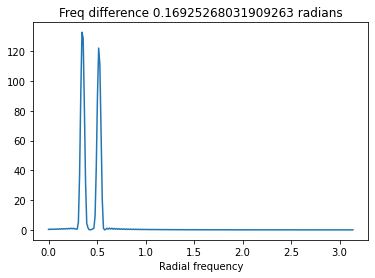

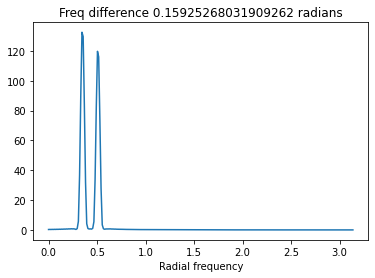

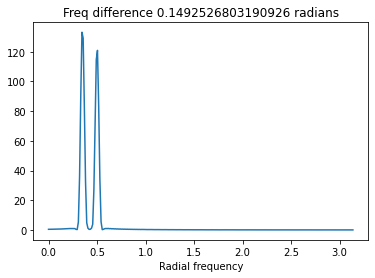

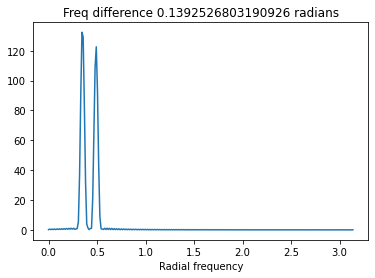

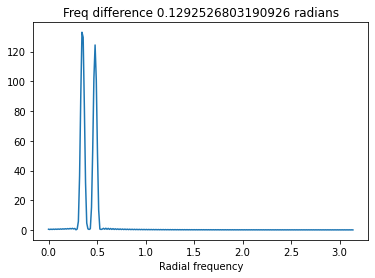

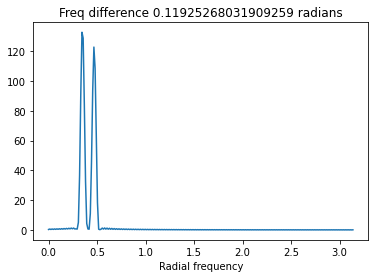

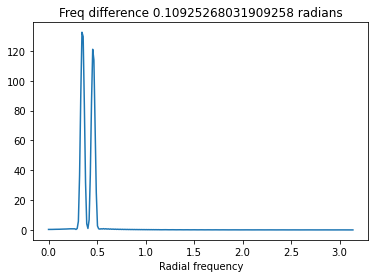

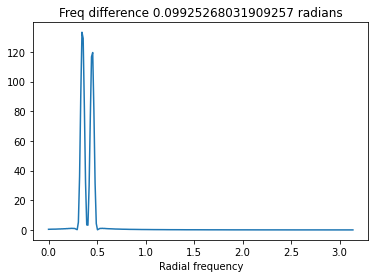

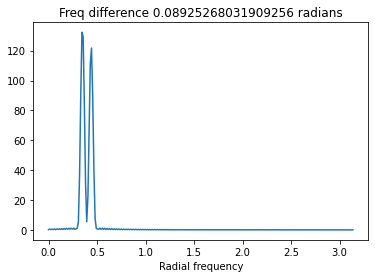

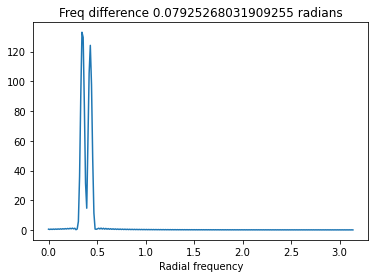

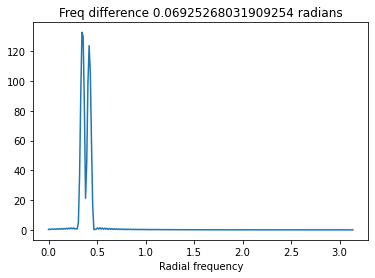

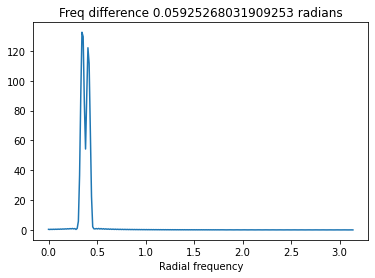

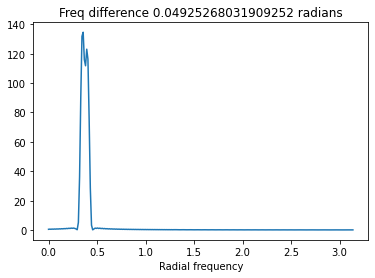

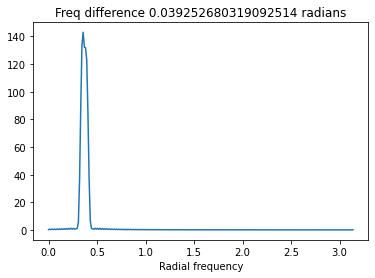

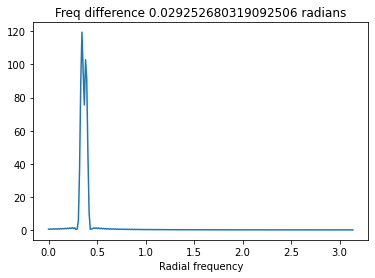

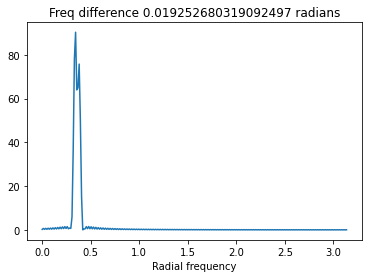

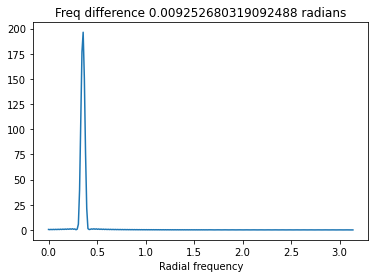

In [5]:
%matplotlib inline
v = np.arange(np.pi/5,np.pi/9,-0.01)

ph1 = random.random() 
ph2 = random.random()

i = 0
for v2 in v:
    i = i+1
    
    x1 = A1*np.exp(1j*(v1*n+ph1))
    x2 = A2*np.exp(1j*(v2*n+ph2))
    y = w*(x1+x2)                     #L = 256 specimens
    
    y_pad1 = np.concatenate((y, np.zeros(256,)), axis=None) #zero padding, 512 specimens
    
    dft = np.fft.fft(y_pad1)
    
    f = np.linspace(0,2*np.pi,512)     #N = 512 specimens
    dft_cut = dft[:256]            
    f_cut = f[:256]
    plt.figure(i)
    plt.plot(f_cut,abs(dft_cut))
    plt.xlabel('Radial frequency')
    plt.title('Freq difference ' + str(v2-v1) + ' radians')


N = 1024

C:\Users\Admin\AppData\Local\Temp\ipykernel_19176\4015432172.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


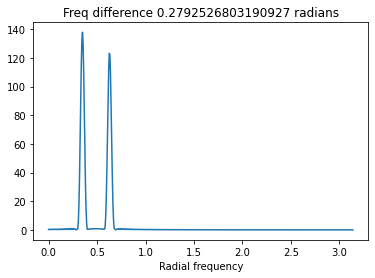

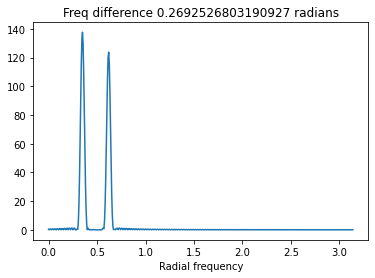

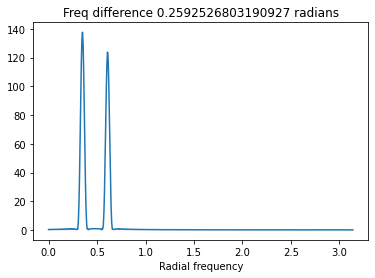

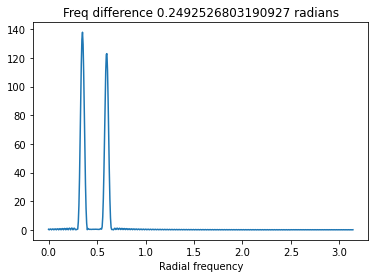

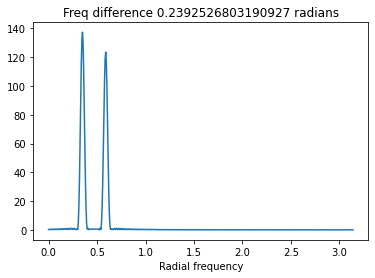

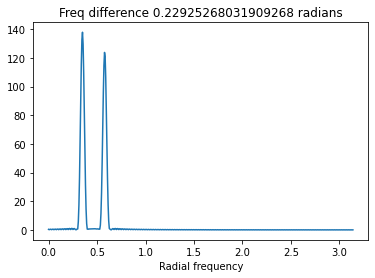

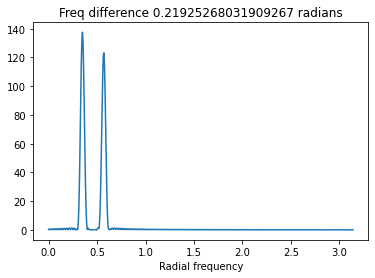

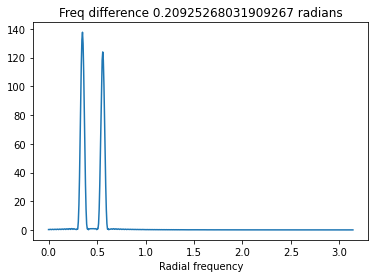

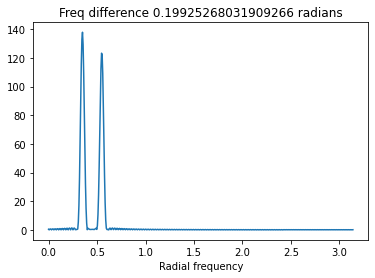

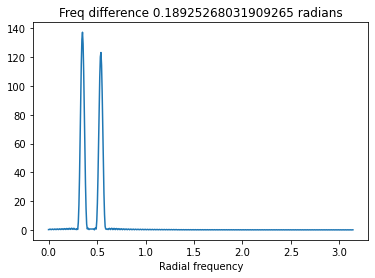

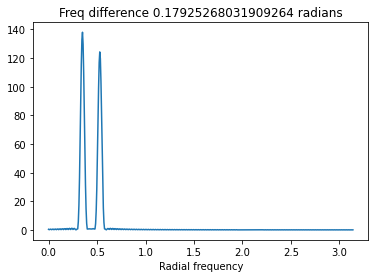

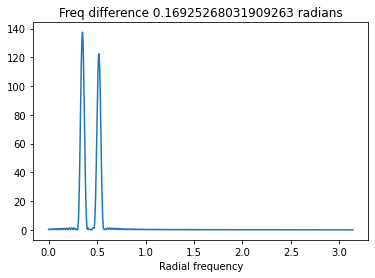

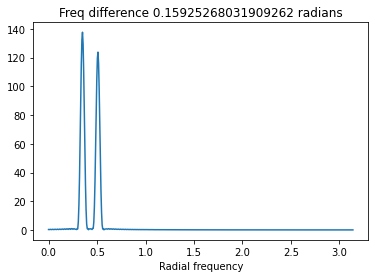

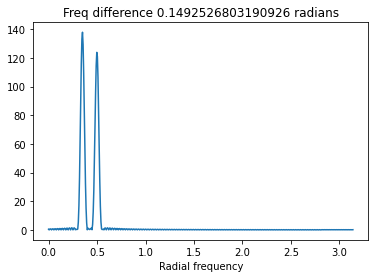

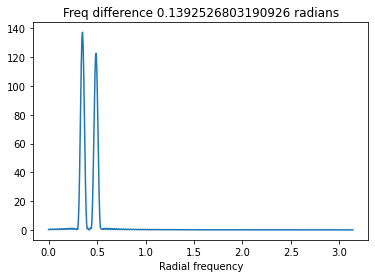

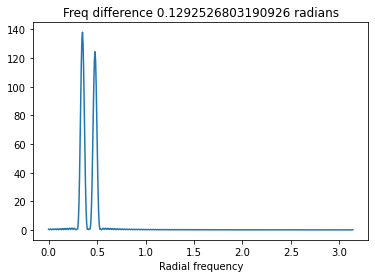

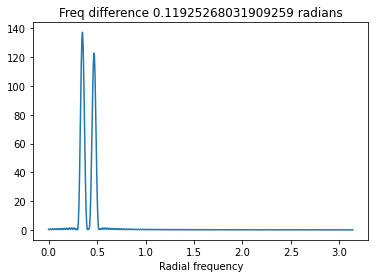

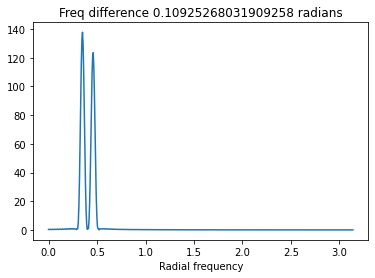

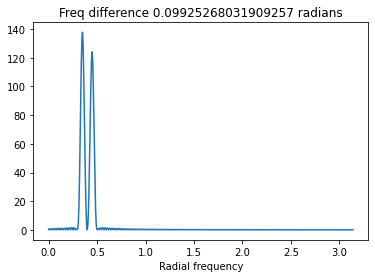

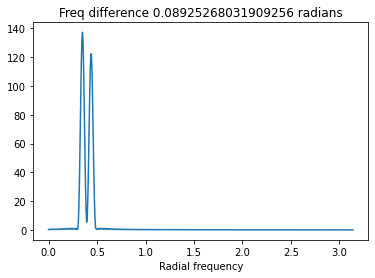

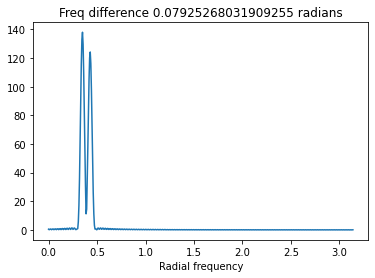

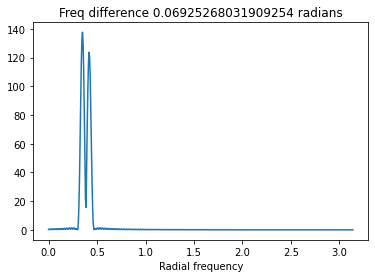

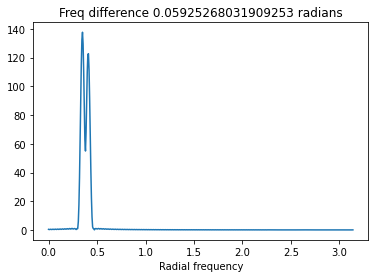

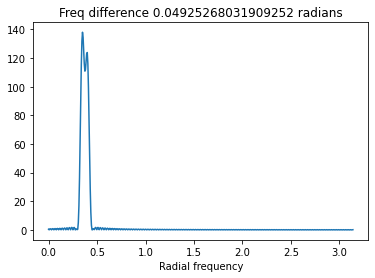

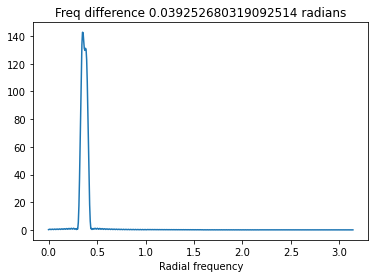

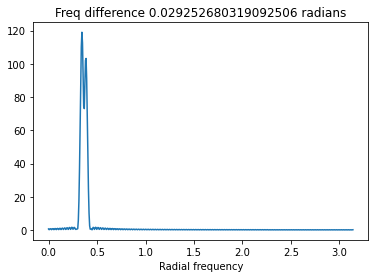

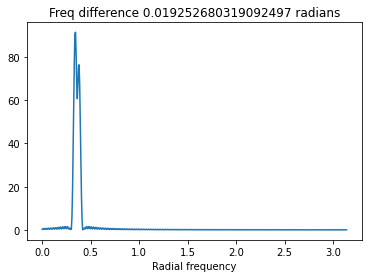

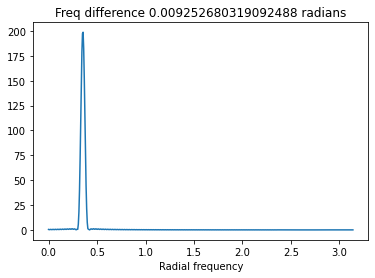

In [7]:
%matplotlib inline
v = np.arange(np.pi/5,np.pi/9,-0.01)

ph1 = random.random() 
ph2 = random.random()    

i = 0
for v2 in v:
    i = i+1
 
    x1 = A1*np.exp(1j*(v1*n+ph1))
    x2 = A2*np.exp(1j*(v2*n+ph2))
    y = w*(x1+x2)                     #L = 256 specimens
    
    y_pad2 = np.concatenate((y, np.zeros(768,)), axis=None) #zero padding, 1024 specimens
    
    dft = np.fft.fft(y_pad2)
    
    f = np.linspace(0,2*np.pi,1024)      #N = 1024 specimens
    dft_cut = dft[:512]            # for transparency of DFT
    f_cut = f[:512]
    plt.figure(i)
    plt.plot(f_cut,abs(dft_cut))
    plt.xlabel('Radial frequency')
    plt.title('Freq difference ' + str(v2-v1) + ' radians')

Query 1.3

L = 512

Text(0.5, 1.0, 'DFT of y')

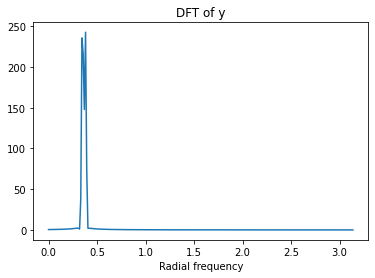

In [8]:
%matplotlib inline
L = 512
w = np.hamming(L) #Hamming window of L specimens

ph1 = random.random()
ph2 = random.random()
v1 = np.pi/9
v2 = np.pi/9 + 0.02925268  #i can barely tell v1 v2 apart - v2 - v1 might be less
A1 = 1
A2 = 0.9

n = np.arange(0,L,1)
x1 = A1*np.exp(1j*(v1*n+ph1)) #complex exponential of frequency v1
x2 = A2*np.exp(1j*(v2*n+ph2)) #complex exponential of frequency v2

y = w * (x1 + x2)
dft = np.fft.fft(y) #DFT of windowed signal x1 + x2

N = 512    #N specimens of radial frequency must be equal to my signal's specimens
f = np.linspace(0,2*np.pi,N)
dft_cut = dft[:256]            
f_cut = f[:256]
plt.plot(f_cut,abs(dft_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of y')

finding new Δω for L = 512

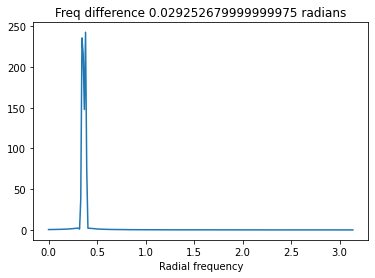

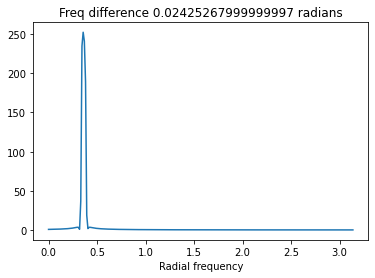

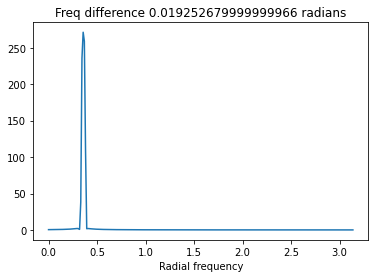

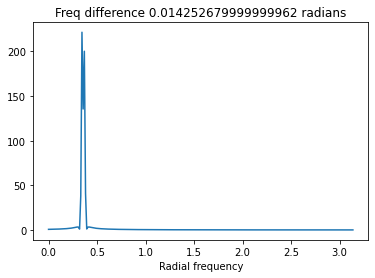

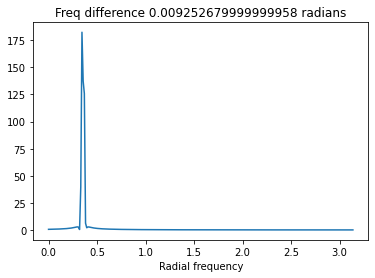

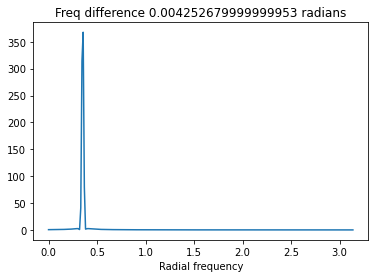

In [9]:
%matplotlib inline
v = np.arange(np.pi/9 + 0.02925268,np.pi/9,-0.005)

i = 0
for v2 in v:
    i = i+1
    x2 = A2*np.exp(1j*(v2*n+ph2))
    y = w*(x1+x2)                  #L = 512 specimens
    dft = np.fft.fft(y)
    dft_cut = dft[:256]            
    plt.figure(i)
    plt.plot(f_cut,abs(dft_cut))
    plt.xlabel('Radial frequency')
    plt.title('Freq difference ' + str(v2-v1) + ' radians')


L = 1024

Text(0.5, 1.0, 'DFT of y')

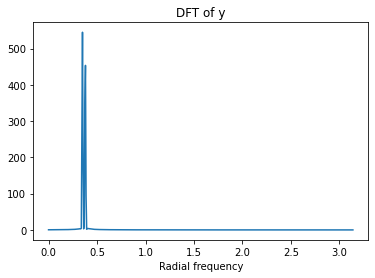

In [10]:
%matplotlib inline
L = 1024
w = np.hamming(L) #Hamming window of L specimens

ph1 = random.random()
ph2 = random.random()
v1 = np.pi/9
v2 = np.pi/9 + 0.02925268
A1 = 1
A2 = 0.9

n = np.arange(0,L,1)
x1 = A1*np.exp(1j*(v1*n+ph1)) #complex exponential of frequency v1
x2 = A2*np.exp(1j*(v2*n+ph2)) #complex exponential of frequency v2

y = w * (x1 + x2)
dft = np.fft.fft(y) #DFT of windowed signal x1 + x2

N = 1024   #N specimens of radial frequency must be equal to my signal's specimens
f = np.linspace(0,2*np.pi,N)

dft_cut = dft[:512] # for transparency of DFT
f_cut = f[:512]

plt.plot(f_cut,abs(dft_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of y')

finding new Δω for L = 1024

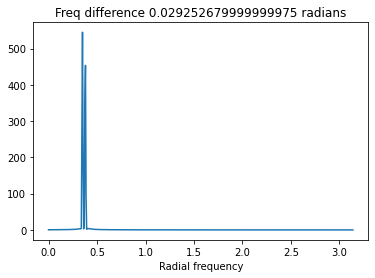

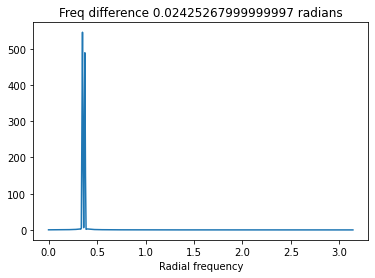

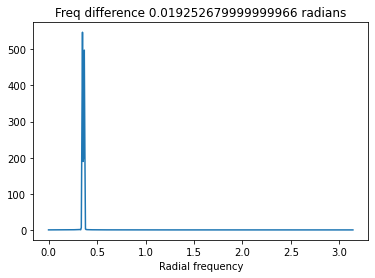

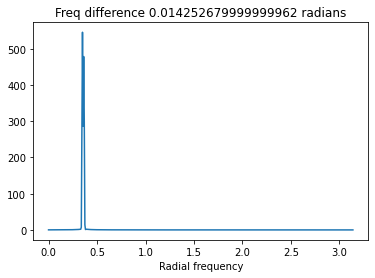

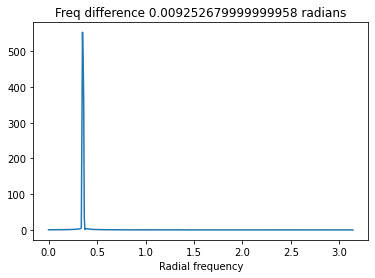

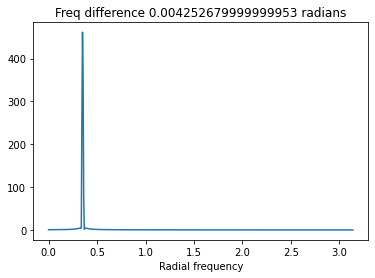

In [11]:
%matplotlib inline
v = np.arange(np.pi/9 + 0.02925268,np.pi/9,-0.005)

i = 0
for v2 in v:
    i = i+1
    x2 = A2*np.exp(1j*(v2*n+ph2))
    y = w*(x1+x2)                  #L = 1024 specimens
    dft = np.fft.fft(y)
    
    dft_cut = dft[:512] 
    f_cut = f[:512]
    
    plt.figure(i)
    plt.plot(f_cut,abs(dft_cut))
    plt.xlabel('Radial frequency')
    plt.title('Freq difference ' + str(v2-v1) + ' radians')


Query 1.4

DFT using Hamming Window

(-1.0, 1.0)

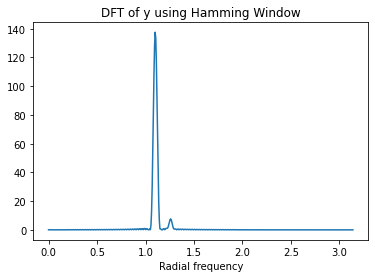

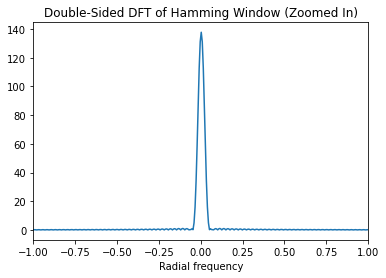

In [12]:
%matplotlib inline
L = 256

ph1 = random.uniform(0,2*np.pi)
ph2 = random.uniform(0,2*np.pi)
v1 = 0.35*np.pi
v2 = 0.4*np.pi
A1 = 1
A2 = 0.05

n = np.arange(0,L,1)
x1 = A1*np.exp(1j*(v1*n+ph1)) #complex exponential of frequency v1
x2 = A2*np.exp(1j*(v2*n+ph2)) #complex exponential of frequency v2

w = np.hamming(L) #Hamming window of L specimens

y = w * (x1 + x2)
y_pad2 = np.concatenate((y, np.zeros(768,)), axis=None) #zero padding, 1024 specimens
w_pad = np.concatenate((w, np.zeros(768,)), axis=None)
    
dft = np.fft.fft(y_pad2) #DFT of windowed signal x1 + x2
dft_hamming = np.fft.fft(w_pad) #DFT of Hamming Window

dft_hamming = np.fft.fftshift(dft_hamming) #double-sided spectrum of window
f_shifted = np.linspace(-np.pi,np.pi,N)

N = 1024   #N specimens of radial frequency must be equal to my signal's specimens
f = np.linspace(0,2*np.pi,N)

dft_cut = dft[:512] # for transparency of DFT
f_cut = f[:512]

plt.figure(1)
plt.plot(f_cut,abs(dft_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of y using Hamming Window')

plt.figure(2)
plt.plot(f_shifted,abs(dft_hamming))
plt.xlabel('Radial frequency')
plt.title('Double-Sided DFT of Hamming Window (Zoomed In)')
plt.xlim(-1,1)

DFT using Rectangular Window

(-1.0, 1.0)

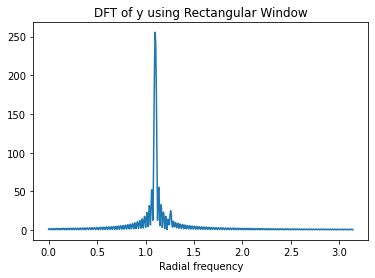

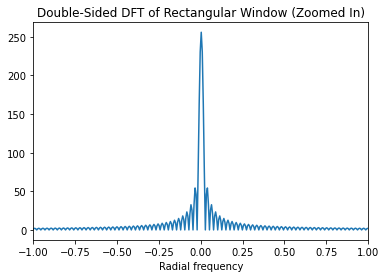

In [13]:
%matplotlib inline
w = np.ones(L,) #rectangular window of L specimens

y = w * (x1 + x2)
y_pad2 = np.concatenate((y, np.zeros(768,)), axis=None) #zero padding, 1024 specimens
w_pad = np.concatenate((w, np.zeros(768,)), axis=None)
    
dft = np.fft.fft(y_pad2) #DFT of windowed signal x1 + x2
dft_rect = np.fft.fft(w_pad)

N = 1024   #N specimens of radial frequency must be equal to my signal's specimens
f = np.linspace(0,2*np.pi,N)

dft_rect = np.fft.fftshift(dft_rect)
f_shifted = np.linspace(-np.pi,np.pi,N)

dft_cut = dft[:512] # for transparency of DFT
f_cut = f[:512]

plt.figure(1)
plt.plot(f_cut,abs(dft_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of y using Rectangular Window')

plt.figure(2)
plt.plot(f_shifted,abs(dft_rect))
plt.xlabel('Radial frequency')
plt.title('Double-Sided DFT of Rectangular Window (Zoomed In)')
plt.xlim(-1,1)

Code for second exercise

Query 2.1

In [14]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd
import soundfile as sf

In [15]:
n = np.arange(0,1000,1) # 1000 specimens

d0 = np.sin(0.7217*n) + np.sin(1.0247*n)
d1 = np.sin(0.5346*n) + np.sin(0.9273*n)
d2 = np.sin(0.5346*n) + np.sin(1.0247*n)
d3 = np.sin(0.5346*n) + np.sin(1.1328*n)
d4 = np.sin(0.5906*n) + np.sin(0.9273*n)
d5 = np.sin(0.5906*n) + np.sin(1.0247*n)
d6 = np.sin(0.5906*n) + np.sin(1.1328*n)
d7 = np.sin(0.6535*n) + np.sin(0.9273*n)
d8 = np.sin(0.6535*n) + np.sin(1.0247*n)
d9 = np.sin(0.6535*n) + np.sin(1.1328*n)

sd.play(d9,8192)

Query 2.2

Text(0.5, 1.0, 'DFT of d8')

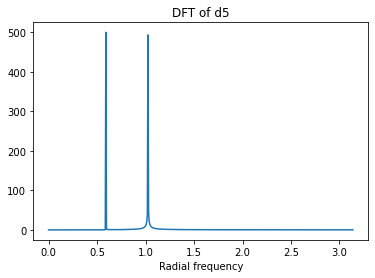

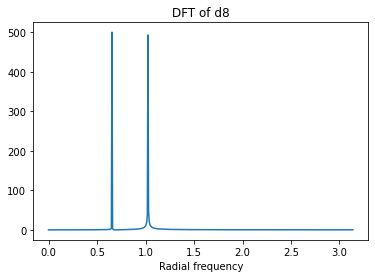

In [20]:
%matplotlib inline
dft5 = np.fft.fft(d5)
dft8 = np.fft.fft(d8)

f = np.linspace(0,2*np.pi,1000)

dft5_cut = dft5[:500]
dft8_cut = dft8[:500]
f_cut = f[:500]

plt.figure(1)
plt.plot(f_cut,np.abs(dft5_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of d5')

plt.figure(2)
plt.plot(f_cut,np.abs(dft8_cut))
plt.xlabel('Radial frequency')
plt.title('DFT of d8')

Query 2.3

In [21]:
#   03119024
# + 03119858
# ----------
#   06238882

z = np.zeros(100,)

t = np.concatenate((d0,z,d6,z,d2,z,d3,z,d8,z,d8,z,d8,z,d2), axis = None)

sf.write('tone_sequence.wav',t,8192)
sd.play(t,8192)

Query 2.4

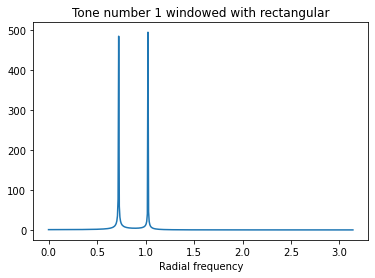

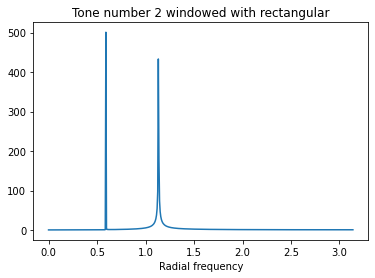

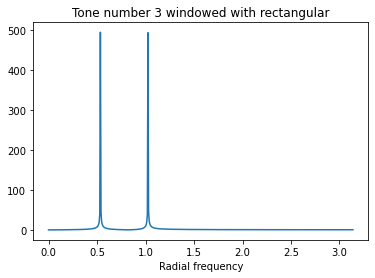

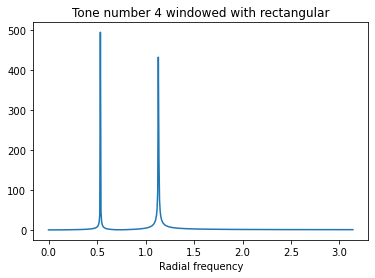

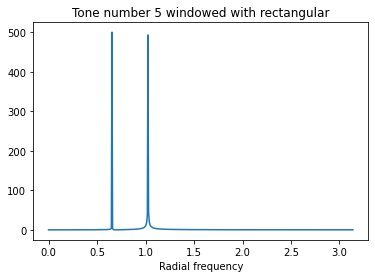

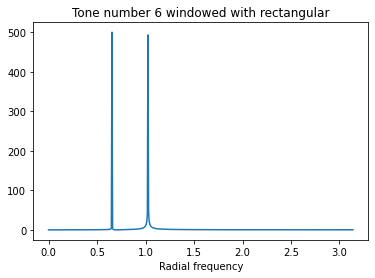

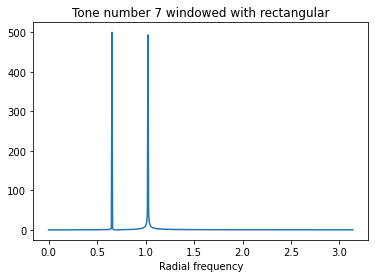

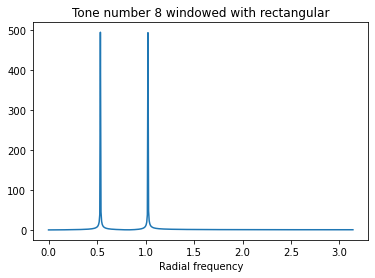

In [22]:
WR = np.ones(1000,)   # Rectangular window of 1000 specimens

P = 0
count = 0
while count <= t.size- 1000:
        tone = t[count:count+1000] * WR # Tone Rectangularly windowed
        
        #Plot Tone    
        dft_of_tone = np.fft.fft(tone)
        dft_of_tone_cut = dft_of_tone[:500]
        f = np.linspace(0,2*np.pi,1000)
        f_cut = f[:500]
        P = P + 1
        plt.figure(P)
        plt.plot(f_cut,abs(dft_of_tone_cut))
        plt.xlabel('Radial frequency')
        plt.title('Tone number ' + str(P) + ' windowed with rectangular')
        count = count + 1100

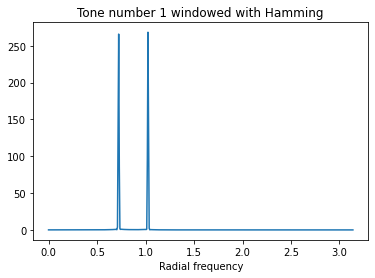

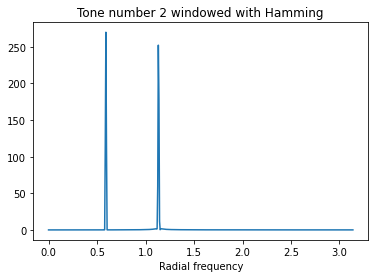

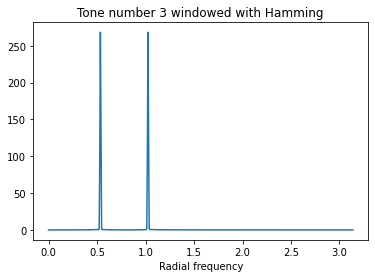

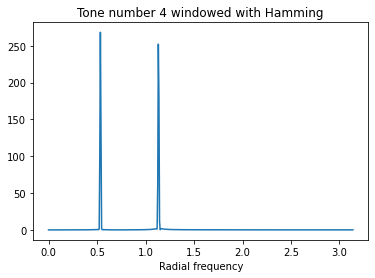

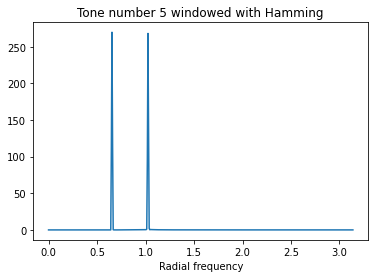

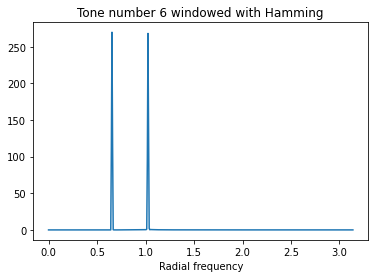

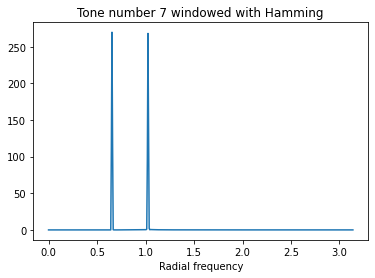

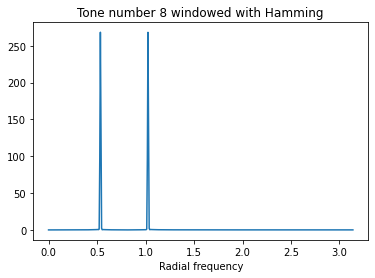

In [17]:
WH = np.hamming(1000) # Hamming window of 1000 specimens

P = 0
count = 0
while count <= t.size - 1000:
        tone = t[count:count+1000] * WH # Tone Hamming windowed
        
        #Plot Tone
        dft_of_tone = np.fft.fft(tone)
        dft_of_tone_cut = dft_of_tone[:500]
        f = np.linspace(0,2*np.pi,1000)
        f_cut = f[:500]
        P = P + 1
        plt.figure(P)
        plt.plot(f_cut,abs(dft_of_tone_cut))
        plt.xlabel('Radial frequency')
        plt.title('Tone number ' + str(P) + ' windowed with Hamming')
        count = count + 1100

Query 2.5

In [26]:
V_Column = [0.9273,1.0247,1.1328]
V_Row = [0.5346, 0.5906, 0.6535, 0.7217]

k_Column = []
k_Row = []
i = 0
for i in range(3): 
    k_Column.append(round(V_Column[i] * 1000/(2*np.pi)))
    k_Row.append(round(V_Row[i] * 1000/(2*np.pi)))

k_Row.append(round(V_Row[3] * 1000/(2*np.pi)))
print(k_Column)
print(k_Row)

DIGITS = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9],
                   [0,0,0]])

[148, 163, 180]
[85, 94, 104, 115]


Query 2.6

In [34]:
def ttdecode(signIn):
    Vector = []  
    count = 0  
    P = 0
    while count <= signIn.size - 1000:
        tone = signIn[count:count+1000]
        tone_En = np.square(np.abs(np.fft.fft(tone))) # Energy of tone
        
#         Plot Tone Energy
#         Tone_En_cut = tone_En[:500]
#         f = np.linspace(0,2*np.pi,1000)
#         f_cut = f[:500]
#         P = P + 1
#         plt.figure(P)
#         plt.plot(f_cut,Tone_En_cut)
#         plt.xlabel('Radial frequency')
#         plt.title('Energy of Tone')
        
        k_row = np.argmax(tone_En[:131])              # index of low frequency peak 
        #print(k_row)
        i = index_of_closest(k_Row,k_row) # Returns the index of the Low frequency which is the closest to the index Κ passed as argument 
        
        k_column = np.argmax(tone_En[131:500]) + 131  # index of hiqh frequency peak 
        #print(k_column)
        j = index_of_closest(k_Column,k_column) # Returns the index of the High frequency which is the closest to the index Κ passed as argument 
        
        digit = DIGITS[i,j] # Returns the digit which corresponds to the pair of frequencies
        Vector.append(digit) 
        count = count + 1100
    return Vector

def index_of_closest(List,value): 
    Diff = [abs(L - value) for L in List]
    Min = min(Diff)
    Index = Diff.index(Min)
    return Index

Sum_of_AM = ttdecode(t)
print(Sum_of_AM)

[0, 6, 2, 3, 8, 8, 8, 2]


Query 2.7

In [35]:
S = np.load('easy_sig.npy')
H = np.load('hard_sig.npy')
print('easy_sig = '  + str(ttdecode(S)))
print('hard_sig = '  + str(ttdecode(H)))


easy_sig = [7, 3, 5, 8, 2, 8, 0, 2]
hard_sig = [4, 3, 5, 6, 6, 2, 0, 9, 9, 5]


Code for third exercise

Query 3.1

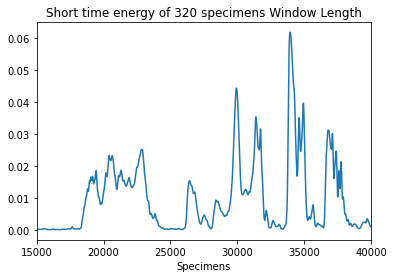

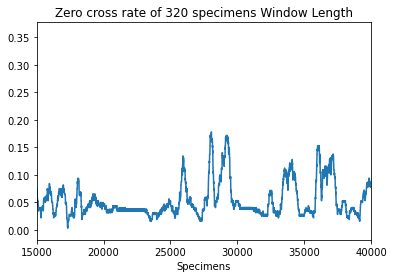

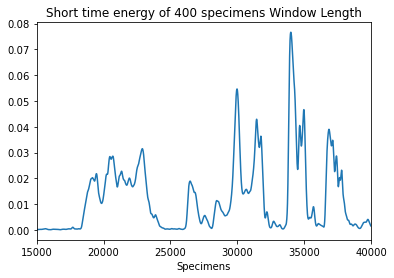

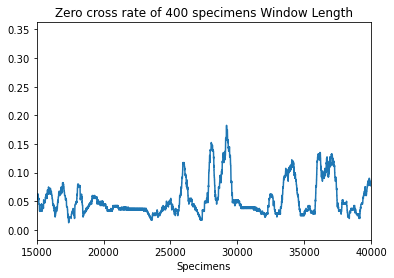

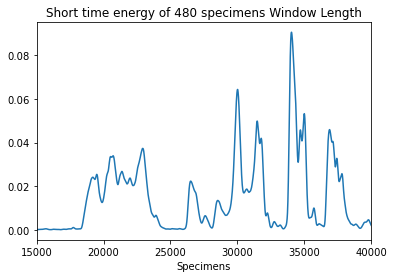

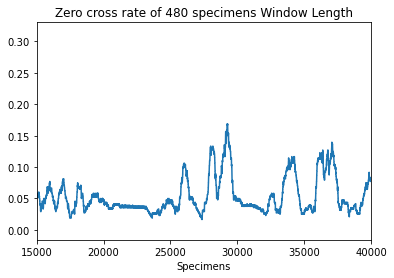

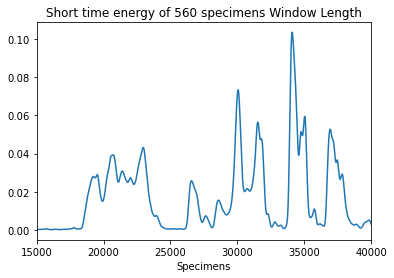

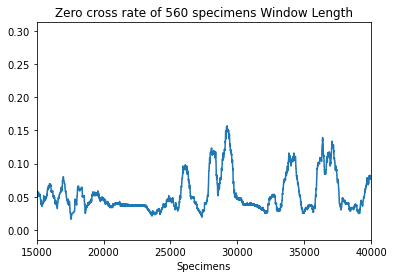

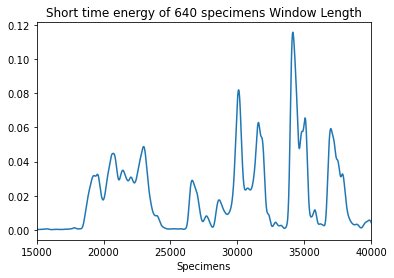

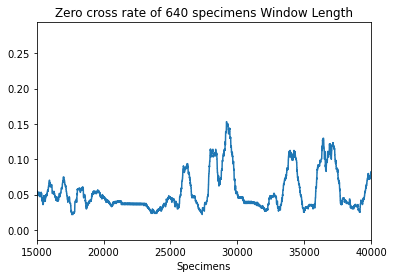

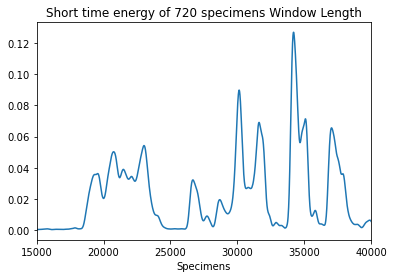

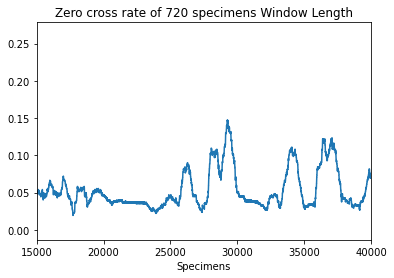

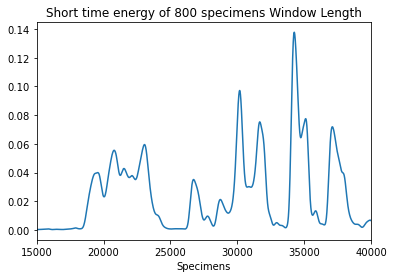

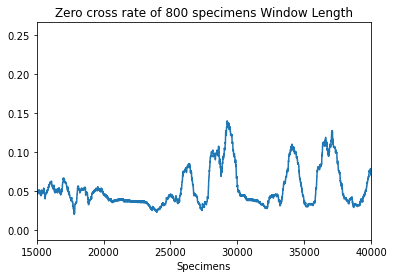

In [49]:
speech, f1 = sf.read('speech_utterance.wav')
Window_Length = np.arange(round(0.02*f1),round(0.05*f1) + 1,5*16) # Window Length in specimens corresponding to values between 20 - 50 ms

i = 0
for N in Window_Length:
    WH = np.hamming(N)
    En = np.convolve(np.square(np.abs(speech)),np.square(WH),'full')
    n = np.arange(0,np.size(En),1)
   
    i = i + 1
    plt.figure(i)
    plt.plot(n,En)
    plt.xlabel('Specimens')
    plt.title('Short time energy of ' + str(N) + ' specimens Window Length')
    plt.xlim(15000,40000) # zoomed in in order to observe differences
    
    WR = 1/(2*N)*np.ones(N,)
    Zn = np.convolve(np.abs(np.sign(speech[1:]) - np.sign(speech[:-1])),WR,'full')
    n = np.arange(0,np.size(Zn),1)
    
    i = i + 1
    plt.figure(i)
    plt.plot(n,Zn)
    plt.xlabel('Specimens')
    plt.title('Zero cross rate of ' + str(N) + ' specimens Window Length')
    plt.xlim(15000,40000) # zoomed in in order to observe differences
    
    

Plotting Short-Time Energy & ZCR Along With Signal (N=640 Specimens (Optimal))

Text(0.5, 0, 'Specimens')

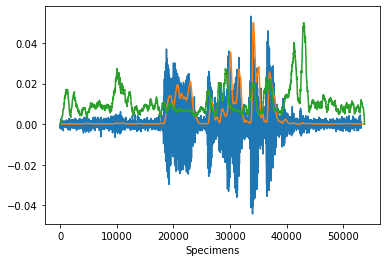

In [50]:
WH = np.hamming(640)
En = np.convolve(np.square(np.abs(speech)),np.square(WH),'full')

WR = (1/(2*640))*np.ones(640,)
Zn = np.convolve(np.abs(np.sign(speech[1:]) - np.sign(speech[:-1])),WR,'full')

En_scaled = np.interp(En, (En.min(), En.max()), (0, +0.05))
Zn_scaled = np.interp(Zn, (Zn.min(), Zn.max()), (0, +0.05))

plt.figure(1)
plt.plot(speech)
plt.plot(En_scaled)
plt.plot(Zn_scaled)
plt.xlabel('Specimens')
#plt.xlim(15000,40000)
#sd.play(speech,16000)

Query 3.2

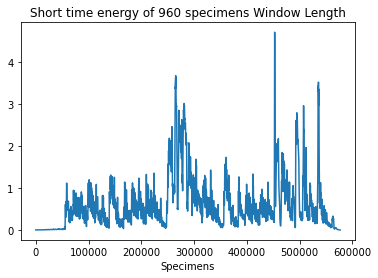

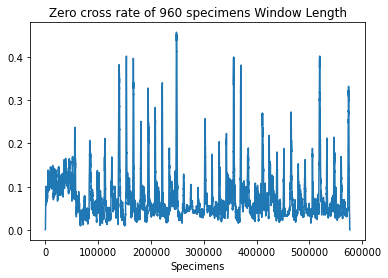

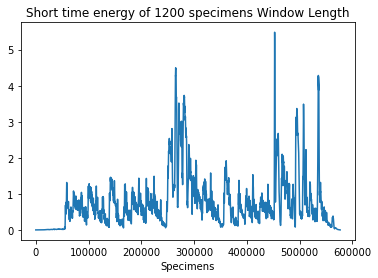

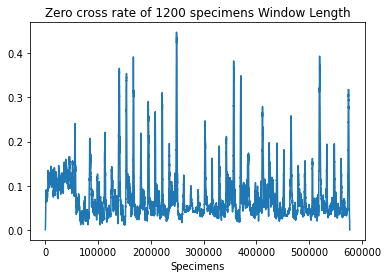

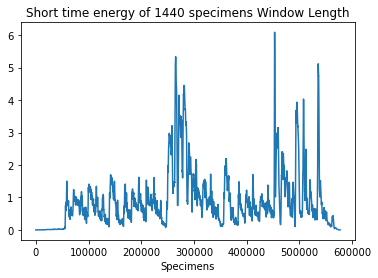

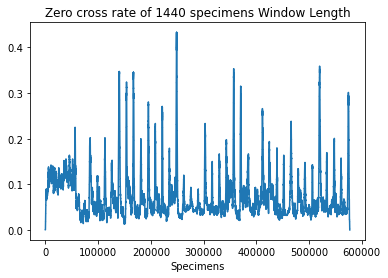

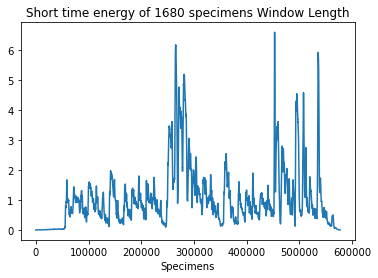

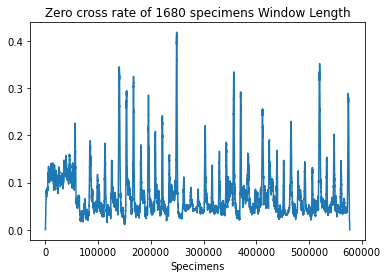

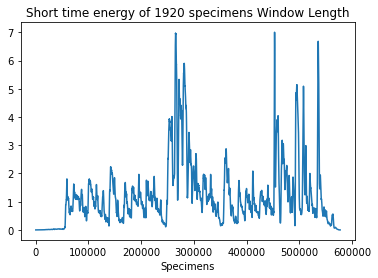

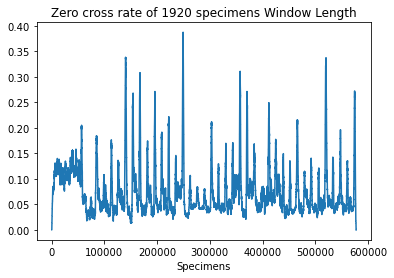

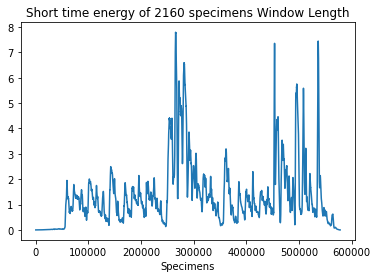

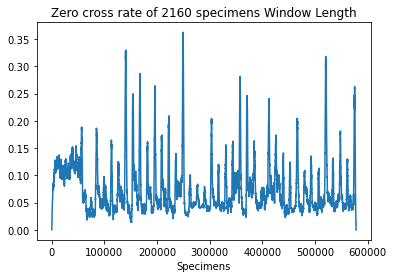

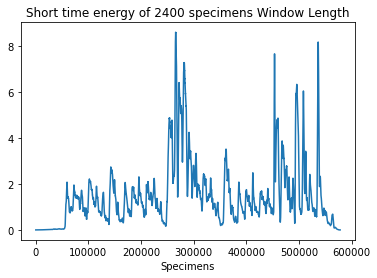

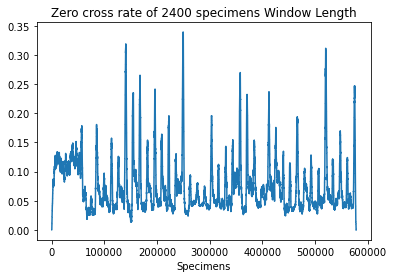

In [51]:
music_stereo, f2 = sf.read('music.wav')
music_mono = music_stereo[:,0]/2 + music_stereo[:,1]/2
Window_Length = np.arange(round(0.02*f2),round(0.05*f2) + 1,5*48) # Window Length in specimens corresponding to values between 20 - 50 ms

i = 0
for N in Window_Length:
    WH = np.hamming(N)
    En = np.convolve(np.square(np.abs(music_mono)),WH,'full')
    n = np.arange(0,np.size(En),1)
    i = i + 1
    plt.figure(i)
    plt.plot(n,En)
    plt.xlabel('Specimens')
    plt.title('Short time energy of ' + str(N) + ' specimens Window Length')
    
    WR = 1/(2*N)*np.ones(N,)
    Zn = np.convolve(np.abs(np.sign(music_mono[1:]) - np.sign(music_mono[:-1])),WR,'full')
    n = np.arange(0,np.size(Zn),1)
    i = i + 1
    plt.figure(i)
    plt.plot(n,Zn)
    plt.xlabel('Specimens')
    plt.title('Zero cross rate of ' + str(N) + ' specimens Window Length')
    